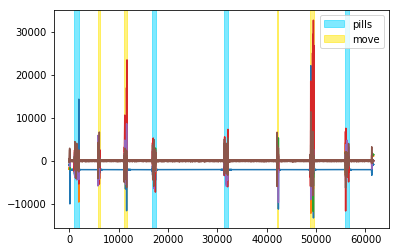

In [3]:
# %matplotlib gtk3
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

INFERRED_LABELS_FILE = 'data/all_blue-orange.npy'
TRUE_LABELS_FILE = 'data/orange-true.npy'

inf = np.load(INFERRED_LABELS_FILE)[0,:,0]
X = np.load(TRUE_LABELS_FILE)
lbls = X[:,-1]

def boundaries(v):
    bounds = list(np.where(v[:-1] != v[1:])[0] + 1)
    bounds.insert(0,0)
    bounds.append(len(v)-1)
    result = []
    for i in range(len(bounds)-1):
        result.append((bounds[i], bounds[i+1], v[bounds[i]]))
    return result

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

N = 3

def to_range(l, cmap):
    total = cmap.N
    idx = int((l[-1] / N) * total)
    return cmap(idx)

event_labels = {1: 'pills', 2: 'move'}

label_bounds = boundaries(lbls)
# _cmap = discrete_cmap(3, 'rainbow')
_cmap = plt.get_cmap('jet')

# plot signals
plt.plot(X[:,:6])
# plot labels
plots = {}
for l in label_bounds:
    if l[-1] > 0:
        ev = event_labels[l[-1]]
        clr = _cmap(l[-1])
        i = plt.axvspan(l[0], l[1], color=to_range(l, _cmap), alpha=0.5, label=ev)
        plots[ev] = i    
# legend
legs = [plots[event_labels[i]] for i in sorted(event_labels)]
nms = [event_labels[i] for i in sorted(event_labels)]
plt.legend(legs, nms)
# plt.legend()
# draw
plt.show()